In [1]:
import pandas as pd
import sqlite3
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("zippedData/{}".format('tn.movie_budgets.csv.gz'))
df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [4]:
#formatting columns into workable/relevant types

In [5]:
df['release_date'] = pd.to_datetime(df['release_date'], format='%b %d, %Y')

In [6]:
df['production_budget'] = df['production_budget'].replace('[\$,]', '', regex=True).astype(float)

In [7]:
df['domestic_gross'] = df['domestic_gross'].replace('[\$,]', '', regex=True).astype(float)

In [8]:
df['worldwide_gross'] = df['worldwide_gross'].replace('[\$,]', '', regex=True).astype(float)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   float64       
 4   domestic_gross     5782 non-null   float64       
 5   worldwide_gross    5782 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 271.2+ KB


In [10]:
#filter out old movies
df_recent = df[df['release_date'] >= datetime.datetime(2000, 1, 1)]
df_recent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4387 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 4387 non-null   int64         
 1   release_date       4387 non-null   datetime64[ns]
 2   movie              4387 non-null   object        
 3   production_budget  4387 non-null   float64       
 4   domestic_gross     4387 non-null   float64       
 5   worldwide_gross    4387 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 239.9+ KB


In [11]:
#analyze budget stats
df_recent['production_budget'].agg(['mean','median','std'])

mean      3.450823e+07
median    1.800000e+07
std       4.550905e+07
Name: production_budget, dtype: float64

In [12]:
min(df_recent['production_budget'])

1100.0

In [13]:
#lower limit of production budget (flexible)
df_recent = df_recent[df_recent['production_budget'] >= 1000000]

In [14]:
#create 'roi' column
df_recent['roi_%'] = ((df_recent['worldwide_gross'] - df_recent['production_budget'])/df_recent['production_budget'])*100

In [15]:
df_recent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4032 entries, 0 to 5325
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 4032 non-null   int64         
 1   release_date       4032 non-null   datetime64[ns]
 2   movie              4032 non-null   object        
 3   production_budget  4032 non-null   float64       
 4   domestic_gross     4032 non-null   float64       
 5   worldwide_gross    4032 non-null   float64       
 6   roi_%              4032 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 252.0+ KB


In [16]:
df_recent.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,roi_%
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,553.257713
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,154.667286
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-57.210757
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,324.384139
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,315.369636


In [43]:
#remove films with $0 gross sales (outlier or input error)
df_recent = df_recent[df_recent['roi_%'] != -100]

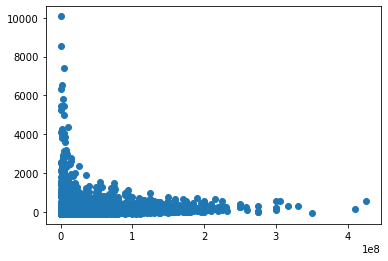

In [44]:
fig, ax = plt.subplots()
ax.scatter(df_recent['production_budget'], df_recent['roi_%'])

In [45]:
import numpy as np
np.corrcoef(df_recent['production_budget'], df_recent['roi_%'])

array([[ 1.        , -0.03747815],
       [-0.03747815,  1.        ]])

In [46]:
#analyzing by 5 year periods
df_recent1 = df_recent[(df_recent['release_date'] >= datetime.datetime(2000, 1, 1)) & (df_recent['release_date'] < datetime.datetime(2005, 1, 1))]
df_recent2 = df_recent[(df_recent['release_date'] >= datetime.datetime(2005, 1, 1)) & (df_recent['release_date'] < datetime.datetime(2010, 1, 1))]
df_recent3 = df_recent[(df_recent['release_date'] >= datetime.datetime(2010, 1, 1)) & (df_recent['release_date'] < datetime.datetime(2015, 1, 1))]
df_recent4 = df_recent[(df_recent['release_date'] >= datetime.datetime(2015, 1, 1)) & (df_recent['release_date'] < datetime.datetime(2020, 1, 1))]

In [47]:
np.corrcoef(df_recent1['production_budget'], df_recent1['roi_%'])

array([[ 1.        , -0.07051316],
       [-0.07051316,  1.        ]])

In [48]:
np.corrcoef(df_recent2['production_budget'], df_recent2['roi_%'])

array([[ 1.      , -0.023167],
       [-0.023167,  1.      ]])

In [49]:
np.corrcoef(df_recent3['production_budget'], df_recent3['roi_%'])

array([[ 1.        , -0.04675453],
       [-0.04675453,  1.        ]])

In [50]:
np.corrcoef(df_recent4['production_budget'], df_recent4['roi_%'])

array([[ 1.        , -0.04017585],
       [-0.04017585,  1.        ]])

In [51]:
#high budget films
df_high = df_recent[df_recent['production_budget'] >= 100000000]

In [52]:
df_high.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383 entries, 0 to 405
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 383 non-null    int64         
 1   release_date       383 non-null    datetime64[ns]
 2   movie              383 non-null    object        
 3   production_budget  383 non-null    float64       
 4   domestic_gross     383 non-null    float64       
 5   worldwide_gross    383 non-null    float64       
 6   roi_%              383 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 23.9+ KB


In [53]:
np.corrcoef(df_high['production_budget'], df_high['roi_%'])

array([[1.        , 0.14087923],
       [0.14087923, 1.        ]])

In [54]:
#medium budget films
df_med = df_recent[(df_recent['production_budget'] >= 50000000) & (df_recent['production_budget'] < 100000000)]

In [55]:
df_med.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 615 entries, 406 to 1204
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 615 non-null    int64         
 1   release_date       615 non-null    datetime64[ns]
 2   movie              615 non-null    object        
 3   production_budget  615 non-null    float64       
 4   domestic_gross     615 non-null    float64       
 5   worldwide_gross    615 non-null    float64       
 6   roi_%              615 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 38.4+ KB


In [56]:
np.corrcoef(df_med['production_budget'], df_med['roi_%'])

array([[1.       , 0.0664686],
       [0.0664686, 1.       ]])

In [57]:
#low budget films
df_low = df_recent[(df_recent['production_budget'] >= 1000000) & (df_recent['production_budget'] < 50000000)]

In [58]:
df_low.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2816 entries, 1209 to 5302
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 2816 non-null   int64         
 1   release_date       2816 non-null   datetime64[ns]
 2   movie              2816 non-null   object        
 3   production_budget  2816 non-null   float64       
 4   domestic_gross     2816 non-null   float64       
 5   worldwide_gross    2816 non-null   float64       
 6   roi_%              2816 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 176.0+ KB


In [59]:
np.corrcoef(df_low['production_budget'], df_low['roi_%'])

array([[ 1.        , -0.12690003],
       [-0.12690003,  1.        ]])

In [60]:
#roi stats by budget

In [61]:
df_recent['roi_%'].agg(['mean','median','std'])

mean      208.341748
median     80.819225
std       526.485946
Name: roi_%, dtype: float64

In [66]:
df_high['roi_%'].agg(['mean','median','std', 'min', 'max'])

mean      209.215227
median    175.320107
std       179.764220
min       -97.181818
max       973.354526
Name: roi_%, dtype: float64

In [67]:
df_med['roi_%'].agg(['mean','median','std', 'min', 'max'])

mean       160.439684
median      98.658093
std        238.823472
min        -99.205725
max       1527.246076
Name: roi_%, dtype: float64

In [68]:
df_low['roi_%'].agg(['mean','median','std', 'min', 'max'])

mean        218.684514
median       54.948808
std         598.351240
min         -99.997400
max       10075.949000
Name: roi_%, dtype: float64